# Import Libraries

In [198]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# 1. Prblem Statement
- Predict SepalLengthCM by other independent Variables
- Independent Variables
    - 1. SepalWidthCM
    - 2. PetalLengthCM
    - 3. PetalWidthCM
    - 4. Species
- Dependent Variable
    - 1. SepalLengthCM

# 2. Data Gathering

In [88]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [46]:
df.shape

(150, 6)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# 3. EDA

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

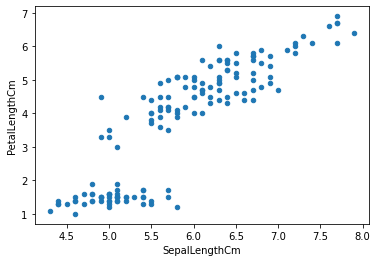

In [53]:
df.plot(x="SepalLengthCm", y="PetalLengthCm",kind="scatter")

## 3.2 Species

In [54]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [55]:
df['Species'].nunique()

3

In [56]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [57]:
df['Species'].value_counts().to_dict()

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

In [58]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 3.3 SepalWidthCm

In [17]:
df[["SepalWidthCm"]]

,SepalWidthCm
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


# 4. Feature Engineering

In [59]:
df['Species'].value_counts().to_dict()

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

In [60]:
df.replace({'Iris-versicolor': 0, 'Iris-virginica': 1, 'Iris-setosa': 2},inplace=True)

In [61]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


# 5. Feature Selection

In [62]:
df.drop('Id',axis=1,inplace=True)

In [63]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [25]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,-0.460039
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,0.612165
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,-0.649101
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,-0.580749
Species,-0.460039,0.612165,-0.649101,-0.580749,1.000000


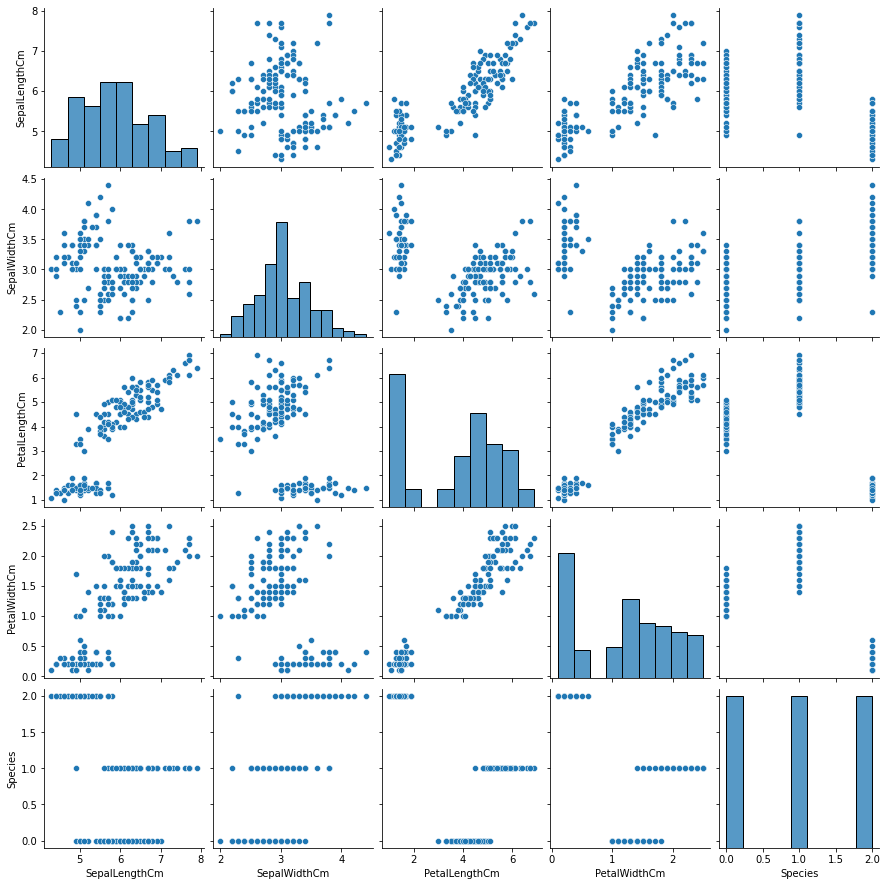

In [26]:
sns.pairplot(df)

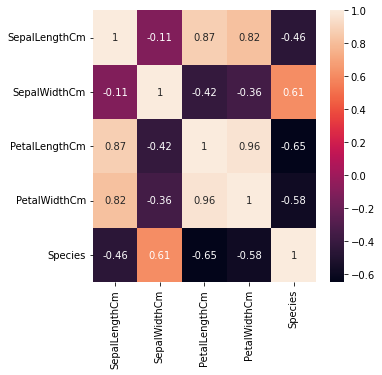

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.savefig("Correlation Matrix.png")

# Model Training

In [116]:
df = df.drop("Id",axis=1)
x = df.drop('Species',axis=1)
y = df["Species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [117]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [118]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=41)

In [119]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
119,6.0,2.2,5.0,1.5
128,6.4,2.8,5.6,2.1
135,7.7,3.0,6.1,2.3
91,6.1,3.0,4.6,1.4
112,6.8,3.0,5.5,2.1
71,6.1,2.8,4.0,1.3
123,6.3,2.7,4.9,1.8
85,6.0,3.4,4.5,1.6
147,6.5,3.0,5.2,2.0
143,6.8,3.2,5.9,2.3


# Create an instance of a linear model

In [158]:

model= KNeighborsClassifier()
model

KNeighborsClassifier()

In [159]:
model.fit(x_train,y_train) # Gradient Descent

KNeighborsClassifier()

# Model Evaluation

In [160]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

# Testing Data Evaluation

In [161]:
y_pred = model.predict(x_test)

#mse = mean_squared_error(y_test, y_pred)
#print(f"Mean Squared Value = {mse}")

#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Value = {rmse}")
score = Kne_classifier.score(x_test,y_test)
print(f"model score = {score}")

acc_score = accuracy_score(y_test,y_pred)
print(f"accuracy_score = {acc_score*100}")

clf_report = classification_report(y_test,y_pred)
print("classification report\n", clf_report)

model score = 0.9666666666666667
accuracy_score = 96.66666666666667
classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



# Training Data Evaluation

In [162]:
y_pred_train = model.predict(x_train)

#mse = mean_squared_error(y_train, y_pred_train)
#print(f"Mean Squared Value = {mse}")

#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Value = {rmse}")

acc_score = accuracy_score(y_train,y_pred_train)
print(f"accuracy_score = {acc_score}")


#adj_r2 = 1 - ((1 - r2_score_val)*len(x_train) - 1) / (len(x_train) - len(x.columns) - 1)
#print(f"Adjusted R Squared value = {adj_r2}")


accuracy_score = 0.9833333333333333


In [134]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [163]:
y_new_pred = model.predict(test_value)
y_new_pred

array(['Iris-setosa'], dtype=object)

## Logistic Regression

In [167]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### Testing Evaluation

In [168]:
y_pred = model.predict(x_test)
score = model.score(x_test,y_test)
print(f"model score = {score}")

acc_score = accuracy_score(y_test,y_pred)
print(f"accuracy_score = {acc_score*100}")

clf_report = classification_report(y_test,y_pred)
print("classification report\n", clf_report)

model score = 0.9333333333333333
accuracy_score = 93.33333333333333
classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



### Training Evaluation

In [169]:
y_pred = model.predict(x_train)
score = model.score(x_train,y_train)
print(f"model score = {score}")

acc_score = accuracy_score(y_train,y_pred)
print(f"accuracy_score = {acc_score*100}")

clf_report = classification_report(y_train,y_pred)
print("classification report\n", clf_report)

model score = 0.9833333333333333
accuracy_score = 98.33333333333333
classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        41
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        40

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120



### Decision Tree

DecisionTreeClassifier(ccp_alpha=0.02, max_depth=4)

DecisionTreeClassifier(ccp_alpha=0.02, max_depth=4)

### Hyper parameter tunning

In [202]:
rf_model = DecisionTreeClassifier()

hyp_grid ={
    "criterion" : ['gini','Entropy'],
    #'n_estimators': np.arange(10,200,10),
    'max_depth' : np.arange(2,10),
    'min_samples_split' : np.arange(2,20),
    'min_samples_leaf'  : np.arange(2,15) 
}

In [203]:
rcv_rf_model= GridSearchCV(rf_model, hyp_grid, cv=5)
rcv_rf_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [204]:
rcv_rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [206]:
model  = DecisionTreeClassifier(criterion='gini',  max_depth=3,min_samples_leaf=2, min_samples_split=2, ccp_alpha=0.02 )
model

DecisionTreeClassifier(ccp_alpha=0.02, max_depth=3, min_samples_leaf=2)

In [207]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, max_depth=3, min_samples_leaf=2)

### Testing Evaluation

In [208]:
y_pred = model.predict(x_test)
score = model.score(x_test,y_test)
print(f"model score = {score}")

acc_score = accuracy_score(y_test,y_pred)
print(f"accuracy_score = {acc_score*100}")

clf_report = classification_report(y_test,y_pred)
print("classification report\n", clf_report)

model score = 0.8333333333333334
accuracy_score = 83.33333333333334
classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.80      0.73      0.76        11
 Iris-virginica       0.73      0.80      0.76        10

       accuracy                           0.83        30
      macro avg       0.84      0.84      0.84        30
   weighted avg       0.84      0.83      0.83        30



### Training Evaluation

In [209]:
y_pred = model.predict(x_train)
score = model.score(x_train,y_train)
print(f"model score = {score}")

acc_score = accuracy_score(y_train,y_pred)
print(f"accuracy_score = {acc_score*100}")

clf_report = classification_report(y_train,y_pred)
print("classification report\n", clf_report)

model score = 0.975
accuracy_score = 97.5
classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        41
Iris-versicolor       0.97      0.95      0.96        39
 Iris-virginica       0.95      0.97      0.96        40

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120



### Gradient Boost Classifier

### HyperParmaeter tuning

In [228]:
rf_model = GradientBoostingClassifier()

hyp_grid ={
    "loss" : ['log_loss', 'deviance'],
    'n_estimators': np.arange(50,200,50),
     
    #'max_feature' : np.arange(2,5),
    'max_depth' : np.arange(2,5),
    'min_samples_split' : np.arange(2,10),
    'min_samples_leaf'  : np.arange(2,15) 
}

In [227]:
rcv_rf_model= GridSearchCV(rf_model, hyp_grid, cv=5)
rcv_rf_model.fit(x_train,y_train)

TypeError: Parameter grid for parameter 'n_estimators' needs to be a list or a numpy array, but got 150 (of type int) instead. Single values need to be wrapped in a list with one element.

In [ ]:
rcv_rf_model.best_params_

In [214]:
model = GradientBoostingClassifier( )
model.fit(x_train,y_train)

GradientBoostingClassifier()

### Testing Evaluation

In [215]:
y_pred = model.predict(x_test)
score = model.score(x_test,y_test)
print(f"model score = {score}")

acc_score = accuracy_score(y_test,y_pred)
print(f"accuracy_score = {acc_score*100}")

clf_report = classification_report(y_test,y_pred)
print("classification report\n", clf_report)

model score = 0.9
accuracy_score = 90.0
classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.91      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



### Training Evaluation

In [216]:
y_pred = model.predict(x_train)
score = model.score(x_train,y_train)
print(f"model score = {score}")

acc_score = accuracy_score(y_train,y_pred)
print(f"accuracy_score = {acc_score*100}")

clf_report = classification_report(y_train,y_pred)
print("classification report\n", clf_report)

model score = 1.0
accuracy_score = 100.0
classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        41
Iris-versicolor       1.00      1.00      1.00        39
 Iris-virginica       1.00      1.00      1.00        40

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



### RandomForest 

### Hyper parameter tuning

In [239]:
rf_model = RandomForestClassifier()
hyp_grid ={
    "criterion" : ['gini','Entropy'],
    'n_estimators': np.arange(10,200,10),
    'max_depth' : np.arange(2,10),
    'min_samples_split' : np.arange(2,20),
    'min_samples_leaf'  : np.arange(2,15) 
}

In [ ]:
rcv_rf_model= GridSearchCV(rf_model, hyp_grid, cv=5)
rcv_rf_model.fit(x_train,y_train)

In [ ]:
rcv_rf_model.best_params_

In [236]:
model = RandomForestClassifier( n_estimators= 150,
 min_samples_split= 13,min_samples_leaf = 2,
 max_depth = 5, criterion = 'gini', random_state=25)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=13,
                       n_estimators=150, random_state=25)

### Testing Evaluation

In [237]:
y_pred = model.predict(x_test)
score = model.score(x_test,y_test)
print(f"model score = {score}")

acc_score = accuracy_score(y_test,y_pred)
print(f"accuracy_score = {acc_score*100}")

clf_report = classification_report(y_test,y_pred)
print("classification report\n", clf_report)

model score = 0.9
accuracy_score = 90.0
classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.91      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



### Training Evaluation

In [238]:
y_pred = model.predict(x_train)
score = model.score(x_train,y_train)
print(f"model score = {score}")

acc_score = accuracy_score(y_train,y_pred)
print(f"accuracy_score = {acc_score*100}")

clf_report = classification_report(y_train,y_pred)
print("classification report\n", clf_report)

model score = 0.975
accuracy_score = 97.5
classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        41
Iris-versicolor       0.97      0.95      0.96        39
 Iris-virginica       0.95      0.97      0.96        40

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120



In [241]:
import pickle
file = open("iris_model.pkl","wb")
pickle.dump(Kne_classifier,file)
file.close()

In [242]:
file = open("iris_model.pkl","rb")
load_model = pickle.load(file)
file.close()

In [243]:
load_model.predict([[6.1, 3.0, 5.2, 2.3]])

array(['Iris-virginica'], dtype=object)